# Video Game Website Scrape 

## Kenyon Williams - September 2023

### Initial Set-up

**~ Importing necessary Packages for Project ~**

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
#Use SSL package if running into errors with scraper
#import ssl
#ssl._create_default_https_context=ssl._create_unverified_context

### Web Scraping

**~ Setting the initial scraper up ~**

In [2]:
scraper=pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_video_games')

**~ Figuring out which of the tables on this URL that I want to focus in on ~**

In [3]:
for idx,table in enumerate(scraper):
    print('*********************************************************************************************')
    print(idx)
    print(table)

*********************************************************************************************
0
                                                   0
0                                        Video games
1  Platforms Arcade video game Console game Game ...
2  Genres Action Beat 'em up Hack and slash Fight...
3  Lists Arcade games highest-grossing Best-selli...
4  Development Game AI Game design Video game des...
5  .mw-parser-output .navbar{display:inline;font-...
*********************************************************************************************
1
                                          Title      Sales  \
0                                     Minecraft  238000000   
1                            Grand Theft Auto V  185000000   
2                                   Tetris (EA)  100000000   
3                                    Wii Sports   82900000   
4                           PUBG: Battlegrounds   75000000   
5                         Mario Kart 8 / Deluxe   63920000   
6  

### Gettting to know the Data

**~ Now that I have established that I want to focus on the table in the 1st index position I will call it and assign it to a dataframe ~**

In [4]:
VideoGameList=scraper[1].drop('Ref',axis=1)
display(HTML(VideoGameList.to_html(index=False)))

Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b]
Minecraft,238000000,Minecraft,Multi-platform,"November 18, 2011[c]",Mojang Studios,Mojang Studios
Grand Theft Auto V,185000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts
Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,Krafton
Mario Kart 8 / Deluxe,63920000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
Super Mario Bros.,58000000,Super Mario,Multi-platform,"September 13, 1985",Nintendo R&D4,Nintendo
Red Dead Redemption 2,55000000,Red Dead,Multi-platform,"October 26, 2018",Rockstar Studios,Rockstar Games
Overwatch,50000000,Overwatch,Multi-platform,"May 24, 2016",Blizzard Entertainment,Blizzard Entertainment
The Witcher 3: Wild Hunt,50000000,The Witcher,Multi-platform,"May 19, 2015",CD Projekt Red,CD Projekt


In [5]:
NACount=VideoGameList.isna().sum()
Overview=VideoGameList.info()
Describe=VideoGameList['Sales'].describe().apply(lambda x: format(x, 'f'))
print(f"\nSales Column Description Table\n{Describe}\n\n{Overview}\n\nCount Of NA Values Per Column \n{NACount}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 50 non-null     object
 1   Sales                 50 non-null     int64 
 2   Series                50 non-null     object
 3   Platform(s)           50 non-null     object
 4   Initial release date  50 non-null     object
 5   Developer(s)[b]       50 non-null     object
 6   Publisher(s)[b]       50 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB

Sales Column Description Table
count           50.000000
mean      43297741.900000
std       38754116.359699
min       23000000.000000
25%       25990000.000000
50%       29745000.000000
75%       44325000.000000
max      238000000.000000
Name: Sales, dtype: object

None

Count Of NA Values Per Column 
Title                   0
Sales                   0
Series                  0
Platform(s)    

### Data Manipulation

**~ Seperating Sales By Platform (Microsoft,Sony,Nintendo,PC) ~**

In [6]:
VideoGameList['Platform(s)'].unique()

array(['Multi-platform', 'Wii', 'Wii U / Switch', 'Game Boy / NES',
       'Nintendo Switch', 'Nintendo DS', 'Game Boy Color', 'NES',
       'Nintendo 3DS', 'Xbox 360', 'Game Boy Advance',
       'PlayStation 4 / Windows', 'PS3 / Xbox 360'], dtype=object)

**~ After going back and looking at the DataFrame it appears as though there are only three entries outside of Multiplatform and Nintendo.It is also worth mentioning that as gaming has evolved over the years more and more companies are releasing their games across multiple platforms to maximize the revenue that they capture. Given that I will be mainly focusing on Multiplatform games ~**

In [7]:
MultiOptions=['Multi-platform']
NOptions=['Wii','Wii U / Switch','Game Boy / NES','NES','Nintendo 3DS','Game Boy Advance']
Nintendo=VideoGameList[VideoGameList['Platform(s)'].isin(NOptions)]
Multi=VideoGameList[VideoGameList['Platform(s)'].isin(MultiOptions)]
display(HTML(Nintendo.to_html(index=False)))

Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b]
Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
Mario Kart 8 / Deluxe,63920000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
Tetris (1989)[f],48000000,Tetris,Game Boy / NES,"June 14, 1989",Nintendo R&D1,Nintendo
Wii Fit / Plus,43800000,Wii,Wii,"December 1, 2007",Nintendo EAD,Nintendo
Mario Kart Wii,37380000,Mario Kart,Wii,"April 10, 2008",Nintendo EAD,Nintendo
Wii Sports Resort,33140000,Wii,Wii,"June 25, 2009",Nintendo EAD,Nintendo
The Legend of Zelda: Breath of the Wild,32350000,The Legend of Zelda,Wii U / Switch,"March 3, 2017",Nintendo EPD,Nintendo
New Super Mario Bros. Wii,30320000,Super Mario,Wii,"November 11, 2009",Nintendo EAD,Nintendo
Duck Hunt,28300000,None,NES,"April 21, 1984",Nintendo R&D1,Nintendo
Wii Play,28020000,Wii,Wii,"December 2, 2006",Nintendo EAD,Nintendo


In [184]:
display(HTML(Nintendo.to_html(index=False)))

Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b]
Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
Mario Kart 8 / Deluxe,63920000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
Tetris (1989)[f],48000000,Tetris,Game Boy / NES,"June 14, 1989",Nintendo R&D1,Nintendo
Wii Fit / Plus,43800000,Wii,Wii,"December 1, 2007",Nintendo EAD,Nintendo
Mario Kart Wii,37380000,Mario Kart,Wii,"April 10, 2008",Nintendo EAD,Nintendo
Wii Sports Resort,33140000,Wii,Wii,"June 25, 2009",Nintendo EAD,Nintendo
The Legend of Zelda: Breath of the Wild,32350000,The Legend of Zelda,Wii U / Switch,"March 3, 2017",Nintendo EPD,Nintendo
New Super Mario Bros. Wii,30320000,Super Mario,Wii,"November 11, 2009",Nintendo EAD,Nintendo
Duck Hunt,28300000,None,NES,"April 21, 1984",Nintendo R&D1,Nintendo
Wii Play,28020000,Wii,Wii,"December 2, 2006",Nintendo EAD,Nintendo


In [8]:
display(HTML(Multi.to_html(index=False)))

Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b]
Minecraft,238000000,Minecraft,Multi-platform,"November 18, 2011[c]",Mojang Studios,Mojang Studios
Grand Theft Auto V,185000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts
PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,Krafton
Super Mario Bros.,58000000,Super Mario,Multi-platform,"September 13, 1985",Nintendo R&D4,Nintendo
Red Dead Redemption 2,55000000,Red Dead,Multi-platform,"October 26, 2018",Rockstar Studios,Rockstar Games
Overwatch,50000000,Overwatch,Multi-platform,"May 24, 2016",Blizzard Entertainment,Blizzard Entertainment
The Witcher 3: Wild Hunt,50000000,The Witcher,Multi-platform,"May 19, 2015",CD Projekt Red,CD Projekt
Pokémon Red / Green / Blue / Yellow,47520000,Pokémon,Multi-platform,"February 27, 1996",Game Freak,Nintendo
Terraria,44500000,None,Multi-platform,"May 16, 2011",Re-Logic,Re-Logic / 505 Games


**~ I decided to create a new merged dataframe that only included the top two competitive platforms in the Dataset at hand (Multi-platform and Nintendo based Platforms). Initially I tried many different merge, joins, and concats that were based on the 1 axis but when merging on 0 axis I was able to exclude missing values from the resulting dataset. Then with the the fact in mind that the original table was already sorted based on Sales per Video Game Title I went ahead and excuted a sort_values based on index on the newly merged dataframe. ~**

In [9]:
Merge=pd.concat([Multi,Nintendo],axis=0,sort=False,copy=False,ignore_index=False)
Merged=Merge.sort_index(ascending=True)
display(HTML(Merged.to_html(index=False)))

Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b]
Minecraft,238000000,Minecraft,Multi-platform,"November 18, 2011[c]",Mojang Studios,Mojang Studios
Grand Theft Auto V,185000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts
Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,Krafton
Mario Kart 8 / Deluxe,63920000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
Super Mario Bros.,58000000,Super Mario,Multi-platform,"September 13, 1985",Nintendo R&D4,Nintendo
Red Dead Redemption 2,55000000,Red Dead,Multi-platform,"October 26, 2018",Rockstar Studios,Rockstar Games
Overwatch,50000000,Overwatch,Multi-platform,"May 24, 2016",Blizzard Entertainment,Blizzard Entertainment
The Witcher 3: Wild Hunt,50000000,The Witcher,Multi-platform,"May 19, 2015",CD Projekt Red,CD Projekt


**~ You can save this now fully rendered dataframe to an Excel File using the line of code below. Be sure to edit in your personal computers information regarding where to save this file to ~**

VideoGameList.to_excel("C:/Users/(enter your user name on your computer here)/Downloads/Video Games.xlsx")

### Visualizations

In [10]:
Nintendo=pd.DataFrame(data=Nintendo)

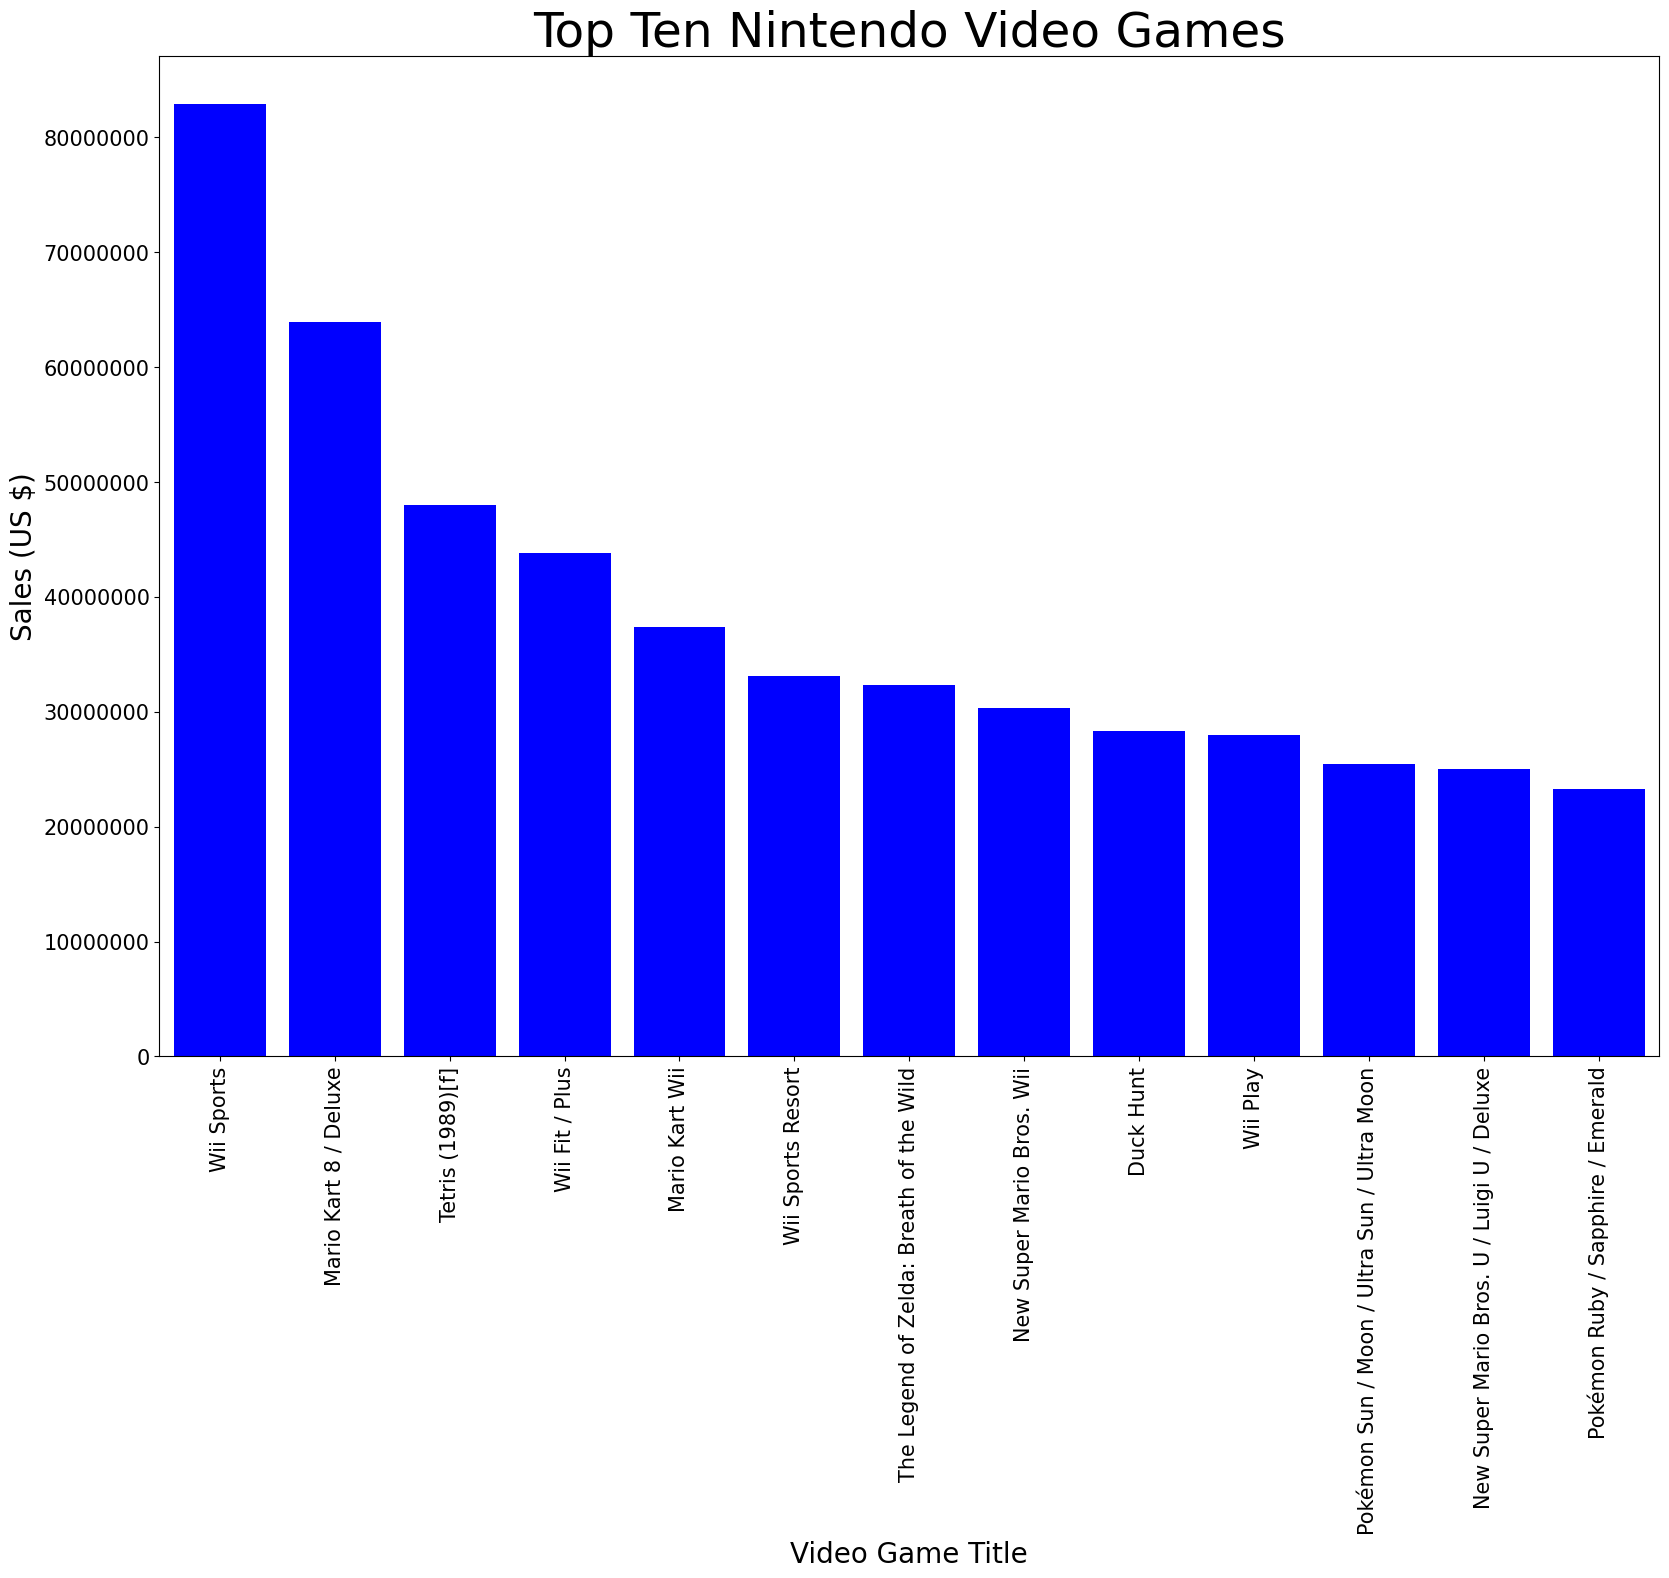

In [12]:
NintendoSalesPlot=plt.figure(figsize=(27,10))
NintendoSalesPlot.set_figwidth(15)
Nintendo_ax=NintendoSalesPlot.add_axes([0,0,1,1])
Nintendo_ax.bar(Nintendo['Title'],Nintendo['Sales'],color='blue')
Nintendo_ax.margins(x=0.01)
Nintendo_ax.ticklabel_format(style='plain',axis='y')
plt.title("Top Ten Nintendo Video Games",fontsize=35)
plt.xlabel("Video Game Title",fontsize=20)
plt.ylabel("Sales (US $)",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**~ Whats clear to see here is that alot of Nintendos success in video game sales came from their Wii console. The wii console was no longer produced after 2013 and as a consequence we can see how their sales numbers fell behind their competitors in this data set ~**

<function matplotlib.pyplot.show(close=None, block=None)>

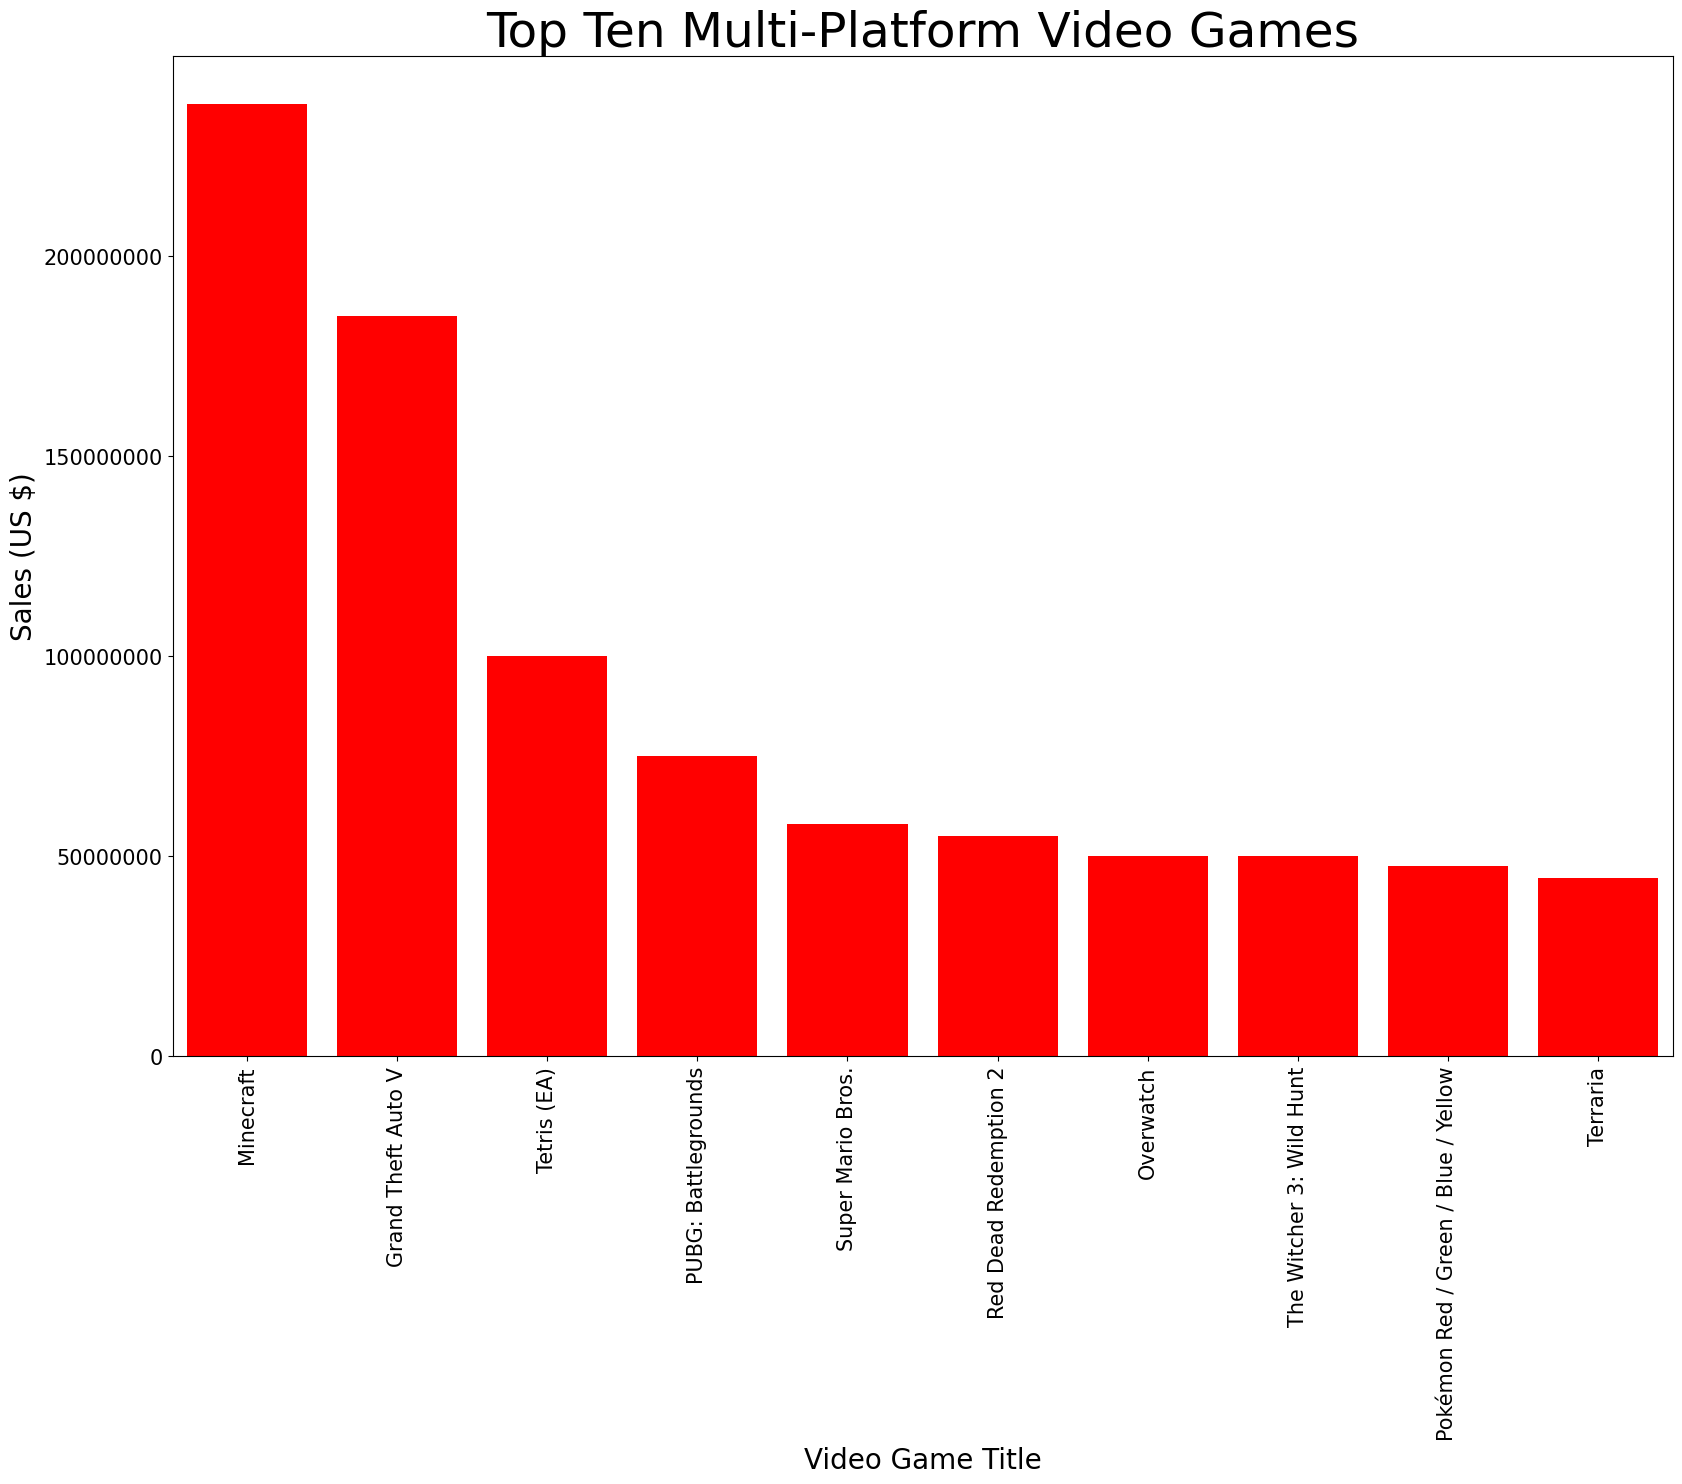

In [13]:
MultiSalesPlot=plt.figure(figsize=(27,10))
MultiSalesPlot.set_figwidth(15)
Multi_ax=MultiSalesPlot.add_axes([0,0,1,1])
Multi_ax.bar(Multi['Title'].head(10),Multi['Sales'].head(10),color='red')
Multi_ax.margins(x=0.01)
Multi_ax.ticklabel_format(style='plain',axis='y')
plt.title("Top Ten Multi-Platform Video Games",fontsize=35)
plt.xlabel("Video Game Title",fontsize=20)
plt.ylabel("Sales (US $)",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show

**~ The insight that I am pulling from the multi-platform graph is that titles that promote colloborative playstyle, whether that be online or not tend to have higher success in terms of sales. To elaborate on this point PUBG being in the top four in terms of sales even further narrows down what video game consumers prefer in terms of types of gamees that they like to play. It seems as though titles that are mainly focuse on player versus player competition tend to do well in sales ~**

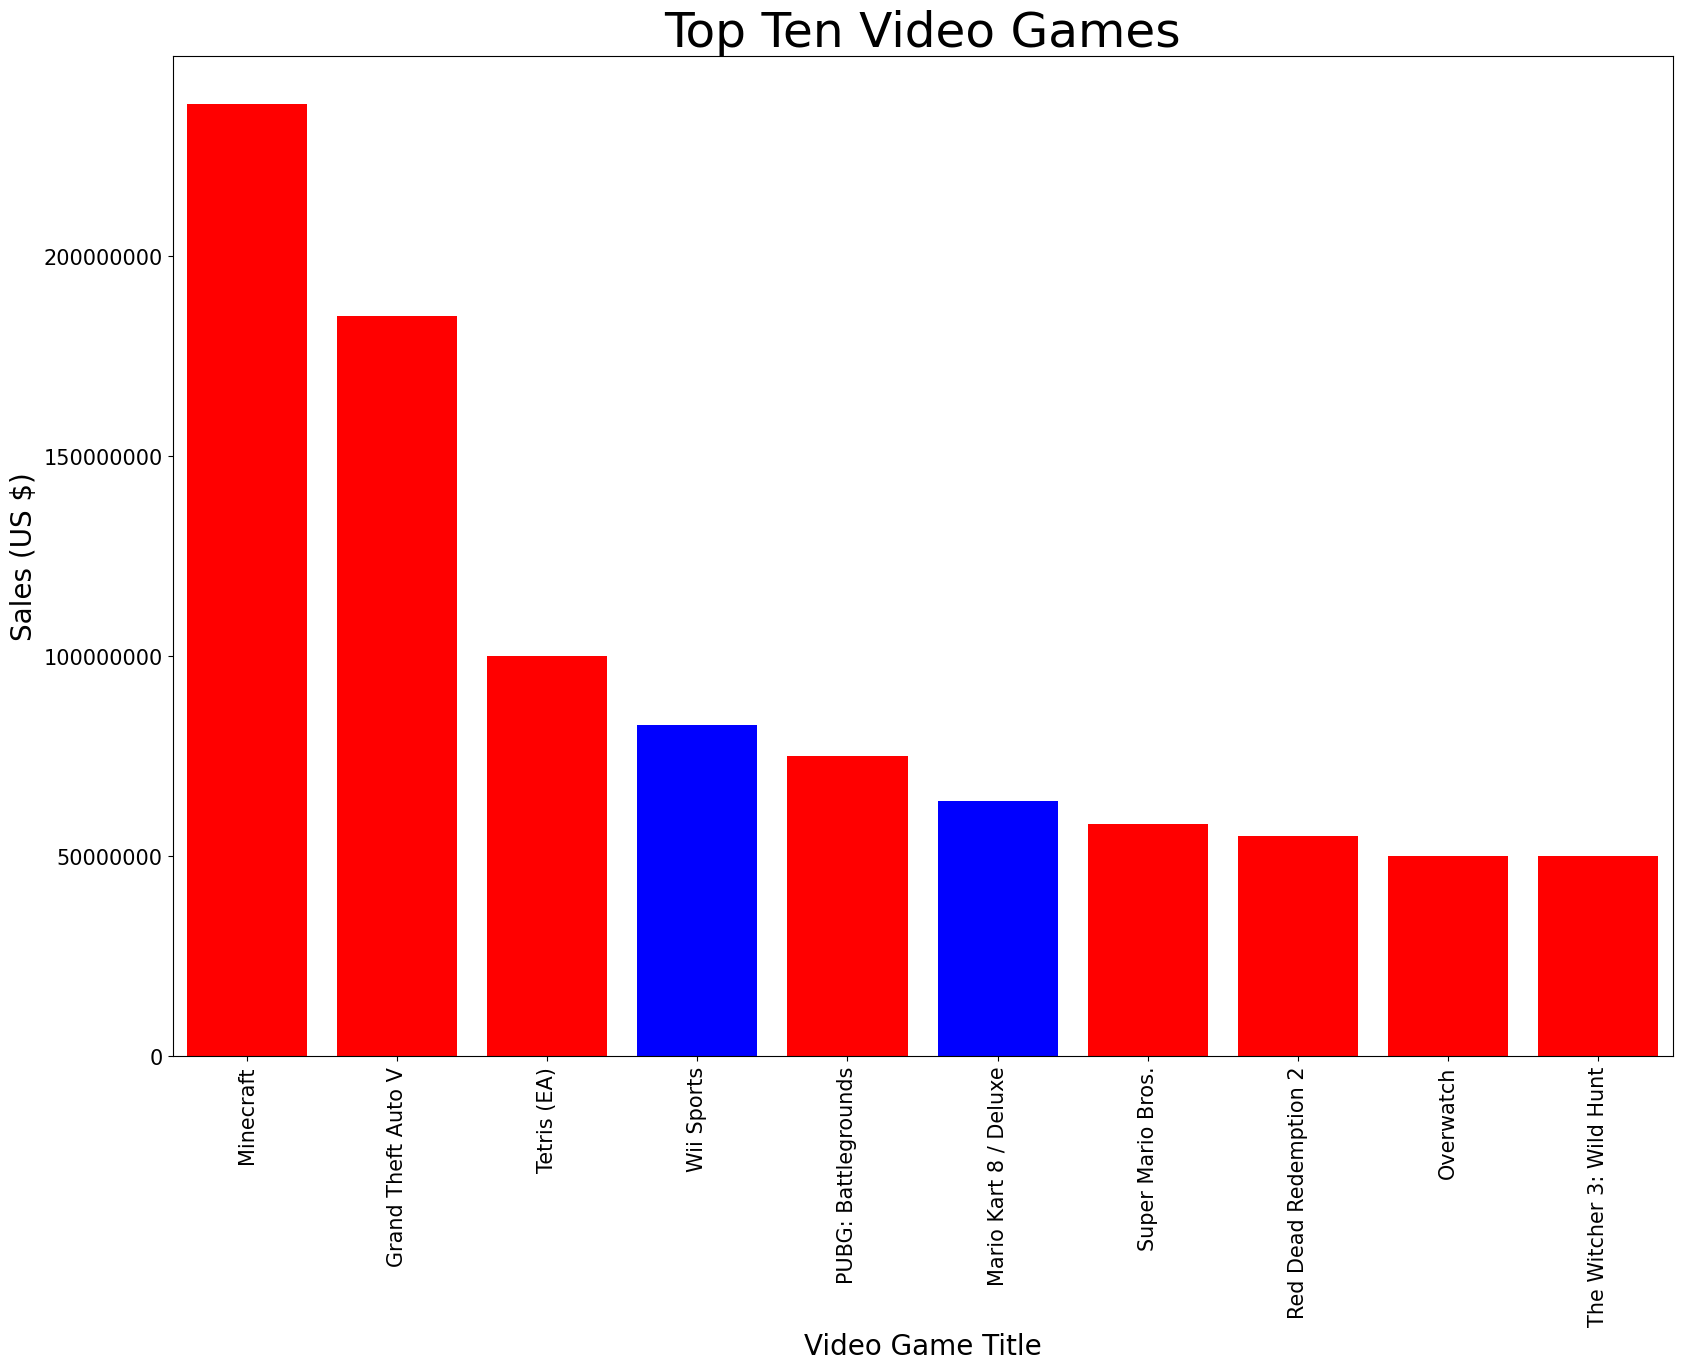

In [14]:
%matplotlib inline
MergeSalesPlot=plt.figure(figsize=(15,10))
MergeSalesPlot.set_figwidth(15)
Merge_ax=MergeSalesPlot.add_axes([0,0,1,1])
Merge_ax.bar(Merged['Title'].head(10),Merged['Sales'].head(10),color=['red','red','red','blue','red','blue','red','red','red','red'])
Merge_ax.margins(x=0.01)
Merge_ax.ticklabel_format(style='plain',axis='y')
plt.title("Top Ten Video Games",fontsize=35)
plt.xlabel("Video Game Title",fontsize=20)
plt.ylabel("Sales (US $)",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**~ This graph emcompasses top ten selling games across multi-platform and nintendo consoles and builds upon the points that I had made about the two graphs that precede this one. What is apparent is that competetive player versus player titles are more popular and do better in sales than their counterparts. Every single title captured in this graph is centered around playing with other or against other players and has built a reputation for being a very successful game. Video game developers should continue to produce games that allow for users to compete against or play with eachother irrespective of the platform that they are playing on. I think that this is being enacted in todays market as we are seeing a constant rise of cross platform gaming that allows users to play online with their friends no matter what console either party owns. An interesting study in the future to conduct would be a more thorough investigation of what game genres tend to see the most success in terms of sales (RPG vs Open World vs Etc). ~**